# Semana 7 Actividad 

## Profesor : Maria de la Paz Rico Fernandez
## Materia   : Ciencia y analítica de datos

### Equipo 17

### Integrantes :

### Kevin Alejandro Garcia Escalante                                    A01376680


### Fecha : 9 de Noviembre de 2022

Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

* Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
Regresión Lineal.
* Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
Regresión Polinomial.
* Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
* Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
* Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)
Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

## Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook). Regresión Lineal.

In [867]:
#Cargar los datos
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
from sklearn import linear_model
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
315,3.862142,39.067720
682,5.087086,38.588554
849,5.775614,38.507035
912,6.236364,25.301994
819,5.618421,30.743783
370,4.058413,33.439681
434,4.235860,41.403990
634,4.950786,33.223241
391,4.116632,36.560617
136,3.049856,54.462176


In [868]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [869]:

# Para ver datos basicos
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

In [870]:
# Ver si hay datos NAN
np.isnan(df)

,Number of Units,Manufacturing Cost
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [871]:
#Para ver si hay valores faltantes en el data frame
df.isnull().sum().sum()

0

In [872]:
from matplotlib import pyplot as plt

In [873]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

print(f'Numero total de registros en la bdd: {len(y)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(y_train)}')
print(f'Tamaño de X_train: {y_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(y_test)}')
print(f'Tamaño del X_test: {y_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 700
Tamaño de X_train: (700,)
**************************************************
Mumero total de registros en el test dataset: 300
Tamaño del X_test: (300,)


## Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada. 

In [874]:
df.shape


(1000, 2)

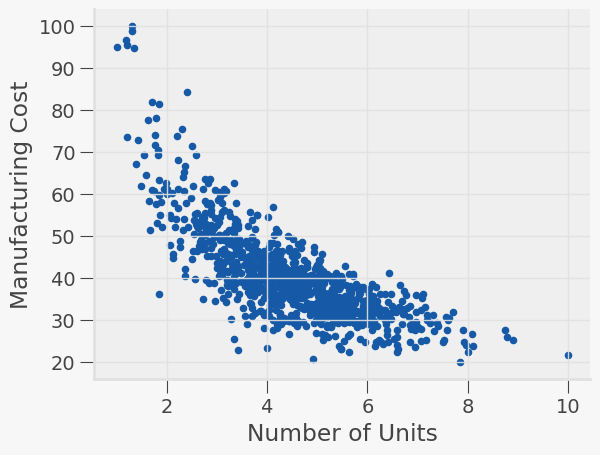

In [875]:
# PLOT DE DATOS
df.plot(kind='scatter', x='Number of Units',y='Manufacturing Cost')
plt.show()

In [876]:
df.corr()

,Number of Units,Manufacturing Cost
Number of Units,1.000000,-0.760905
Manufacturing Cost,-0.760905,1.000000


In [877]:
# HACER LA REGRESION
lm= linear_model.LinearRegression()
model =lm.fit(X,y)

In [878]:
# VER LOS COEFICIENTES 
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Number of Units'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-6.0333683]),
 'rank_': 1,
 'singular_': array([42.23452509]),
 'intercept_': 67.03904193389238}

#### Manufacturing cost = 67.04 +( -6.03 * Number of units)
Ecuacion matematica para predecir 

In [879]:
# REALIZAR PREDICCIONES

y_pred = model.predict(X = df[['Number of Units']])

In [880]:
#INSERTAR PREDICCION EN DATAFRAME
df.insert(0,'pred',y_pred)

### Visualizar modelo

<AxesSubplot:xlabel='Number of Units', ylabel='Manufacturing Cost'>

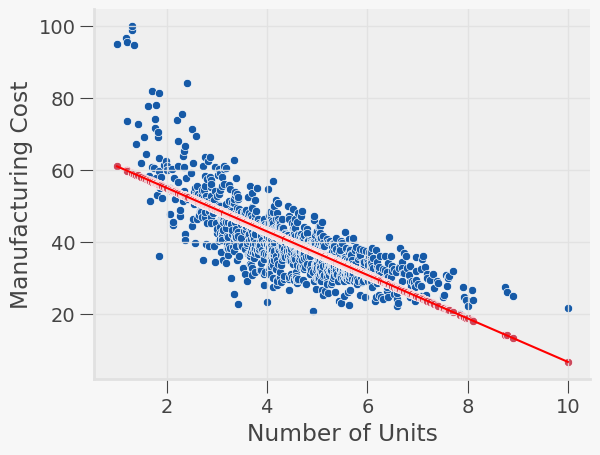

In [881]:
# El modelo representado para cada punto del dataframe
sns.scatterplot(x='Number of Units',y='Manufacturing Cost',data=df)
sns.scatterplot(x='Number of Units',y='pred',data=df)
sns.lineplot(x='Number of Units', y='pred',data=df,color='red' )

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

### R^2
##### R_square = 1 - SSE/SST

In [882]:
ymean= df["Manufacturing Cost"].mean()
ymean

40.05299943155

In [883]:
# SUM OF SQUARES TOTAL

SST = ((y - ymean)**2).sum()
SST


112148.57930284088

In [884]:
# SUM OF ESTIMATED ERRORS
y_hat = y_pred
SSE = ((y - y_hat)**2).sum()
SSE

47217.1586848251

In [885]:
(SST - SSE)/SST

0.5789767558506287

In [886]:
# Es la R^2
1 - SSE/SST

0.5789767558506287

In [887]:
from sklearn import linear_model

In [888]:
model.fit(X,y)

LinearRegression()

In [889]:
# Verificando si la R^2 es correcta
model.score(X,y)

0.5789767558506287

### Bondad de Ajuste

In [890]:
#Para saber que tan bueno es nuestro modelo
model.score(X, y)

0.5789767558506287

In [891]:
#ERROR
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

47.2171586848251

##### EL modelo explica un 58 % de la variabilidad original de Manufacturing costs


## Realiza la regresión polinomial 
completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

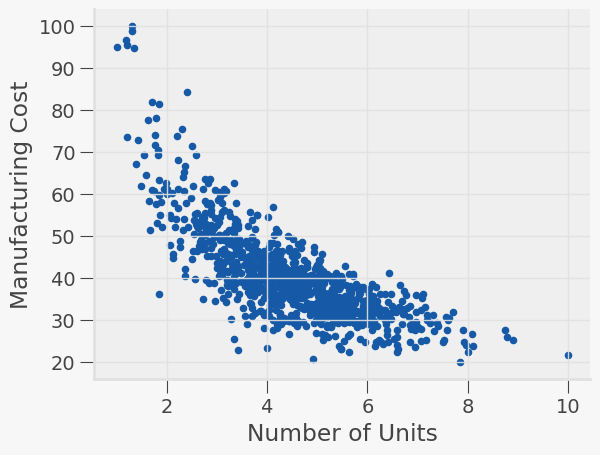

In [892]:
# PLOT DE DATOS
df.plot(kind='scatter', x='Number of Units',y='Manufacturing Cost')
plt.show()

In [893]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [894]:
pre_process = PolynomialFeatures(degree=2) 

In [895]:
#
X_poly = pre_process.fit_transform(X)
X_poly

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   1.18599365,   1.40658094],
       [  1.        ,   1.19149864,   1.41966901],
       ...,
       [  1.        ,   8.78088812,  77.10399623],
       [  1.        ,   8.89769971,  79.16906006],
       [  1.        ,  10.        , 100.        ]])

In [896]:
#HACER LA REGRESION 
pr_model = LinearRegression()
pr_model.fit(X_poly, y)

LinearRegression()

In [897]:
#HACER LA PREDECCION

y_predi = pr_model.predict(X_poly)




In [898]:
#COEFICIENTES DE LA ECUACION
pr_model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 3,
 'coef_': array([  0.        , -16.82425278,   1.17336718]),
 'rank_': 2,
 'singular_': array([399.47126753,   8.85157589,   0.        ]),
 'intercept_': 89.73719677939121}

#### Manufacturing cost = 89.74 +( -16.82 * Number of units)+ (1.17)* Number of units**2
Ecuacion matematica para predecir

In [899]:
df.insert(0,'predi',y_predi)

### Visualizar modelo

<AxesSubplot:xlabel='Number of Units', ylabel='Manufacturing Cost'>

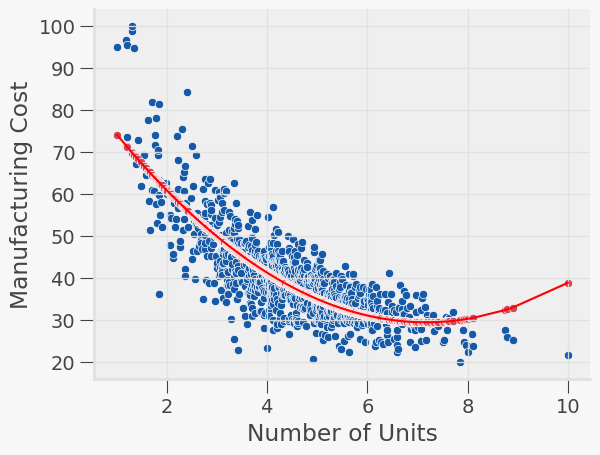

In [900]:
# El modelo representado para cada punto del dataframe
sns.scatterplot(x='Number of Units',y='Manufacturing Cost',data=df)
sns.scatterplot(x='Number of Units',y='predi',data=df)
sns.lineplot(x='Number of Units', y='predi',data=df,color='red' )

### R^2
##### R_square = 1 - SSE/SST

In [901]:
ymean= df["Manufacturing Cost"].mean()
ymean

40.05299943155

In [902]:
# SUM OF SQUARES TOTAL

SST = ((y - ymean)**2).sum()
SST

112148.57930284088

In [903]:
# SUM OF ESTIMATED ERRORS
y_hat = y_predi
SSE = ((y - y_hat)**2).sum()
SSE

37566.7671829745

In [904]:
(SST - SSE)/SST

0.6650268116056028

## Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

### RIDGE 

In [905]:
from sklearn.linear_model import Ridge

In [906]:
rid_model=Ridge(alpha=100)

In [907]:
rid_model.fit(X, y)

Ridge(alpha=100)

In [908]:
#HACER LA PREDICCION
y_predic = rid_model.predict(X)

In [909]:
#SlOPE
print("Slope: %.2f" % rid_model.coef_[0])

Slope: -5.71


In [910]:
# INTERCEPCION Y COEFICIENTES PARA LA ECUACION 
rid_model.__dict__

{'alpha': 100,
 'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'max_iter': None,
 'tol': 0.001,
 'solver': 'auto',
 'positive': False,
 'random_state': None,
 'feature_names_in_': array(['Number of Units'], dtype=object),
 'n_features_in_': 1,
 '_normalize': False,
 'coef_': array([-5.71308419]),
 'n_iter_': None,
 'intercept_': 65.60647554728259}


Y = RSS + 0.5 (-6.03^2)

##### Ecuacion matematica para predecir 
RSS= SUMA RESIDUOS CUADRADOS

In [911]:
#ERROR
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predic)

47.40013969390736

In [912]:
df.insert(0,'predic',y_predic)

In [913]:
df

,predic,predi,pred,Number of Units,Manufacturing Cost
0,59.893391,74.086311,61.005674,1.000000,95.066056
1,58.830794,71.434176,59.883505,1.185994,96.531750
2,58.799344,71.356915,59.850292,1.191499,73.661311
3,58.723515,71.170930,59.770212,1.204771,95.566843
4,58.186477,69.865563,59.203067,1.298773,98.777013
...,...,...,...,...,...
995,19.332153,30.444736,18.170511,8.099710,23.855067
996,15.675539,32.323015,14.308901,8.739752,27.536542
997,15.440522,32.476614,14.060710,8.780888,25.973787
998,14.773168,32.934424,13.355943,8.897700,25.138311


### Visualizar modelo

<AxesSubplot:xlabel='Number of Units', ylabel='Manufacturing Cost'>

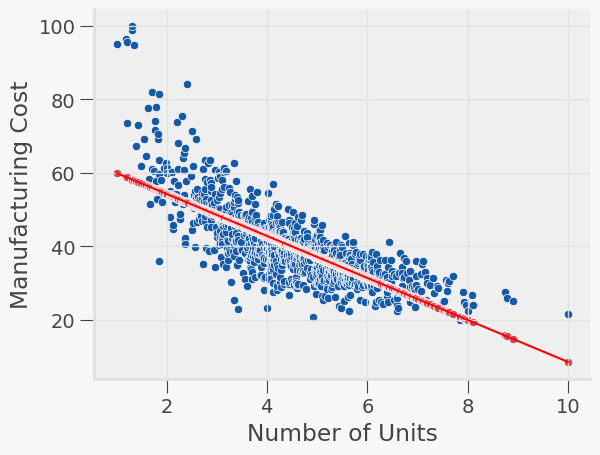

In [914]:
sns.scatterplot(x='Number of Units',y='Manufacturing Cost',data=df)
sns.scatterplot(x='Number of Units',y='predic',data=df)
sns.lineplot(x='Number of Units', y='predic',data=df,color='red' )

### R^2
##### R_square = 1 - SSE/SST

In [915]:
ymean= df["Manufacturing Cost"].mean()
ymean

40.05299943155

In [916]:
# SUM OF SQUARES TOTAL

SST = ((y - ymean)**2).sum()
SST

112148.57930284088

In [917]:
# SUM OF ESTIMATED ERRORS
y_hat = y_predic
SSE = ((y - y_hat)**2).sum()
SSE

47400.13969390736

In [918]:
#R^2
(SST - SSE)/SST

0.5773451613157738

### LASSO

In [919]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 1)

In [920]:
lasso.fit(X,y)

Lasso(alpha=1)

In [921]:
#HACER LA PREDICCION
y_predicci = lasso.predict(X)


In [922]:
lasso.coef_[0]

-5.472753230451032

In [923]:
lasso.intercept_

64.53152351050146

In [924]:
#COEFICIENTES DE LA ECUACION E INTERCEPCION 
lasso.__dict__

{'alpha': 1,
 'l1_ratio': 1.0,
 'fit_intercept': True,
 'normalize': 'deprecated',
 'precompute': False,
 'max_iter': 1000,
 'copy_X': True,
 'tol': 0.0001,
 'warm_start': False,
 'positive': False,
 'random_state': None,
 'selection': 'cyclic',
 'feature_names_in_': array(['Number of Units'], dtype=object),
 'n_features_in_': 1,
 'n_iter_': 2,
 'coef_': array([-5.47275323]),
 'dual_gap_': 0.0,
 'intercept_': 64.53152351050146}


Y = LSO + 1 (-5.47^2)
##### Ecuacion matematica para predecir 
LSO = least square objective

In [925]:
#ERRROR
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predicci)

47.77777375735834

In [926]:
lasso.score(X,y)

0.5739778956241486

In [927]:
df.insert(0,'predicci',y_predicci)

<AxesSubplot:xlabel='Number of Units', ylabel='Manufacturing Cost'>

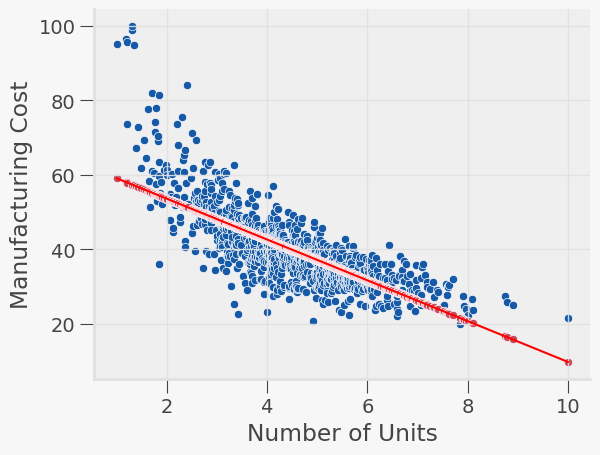

In [928]:
sns.scatterplot(x='Number of Units',y='Manufacturing Cost',data=df)
sns.scatterplot(x='Number of Units',y='predicci',data=df)
sns.lineplot(x='Number of Units', y='predicci',data=df,color='red' )

### R^2
##### R_square = 1 - SSE/SST

In [929]:
ymean= df["Manufacturing Cost"].mean()
ymean

40.05299943155

In [930]:
SST = ((y - ymean)**2).sum()
SST

112148.57930284088

In [931]:
# SUM OF ESTIMATED ERRORS
y_hat = y_predicci
SSE = ((y - y_hat)**2).sum()
SSE

47777.773757358336

In [932]:
# R^2
(SST - SSE)/SST

0.5739778956241485

### MAE y R^2

In [933]:
#ERROR ABSOLUTO MEDIO LINEAR 


In [934]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))                         

Error medio Absoluto (MAE): 4.921245677483368
Root Mean Squared Error: 6.871474273023592
r2_score 0.5789767558506287


In [935]:

from sklearn.metrics import mean_absolute_error

In [936]:
mae = mean_absolute_error(y,y_pred)

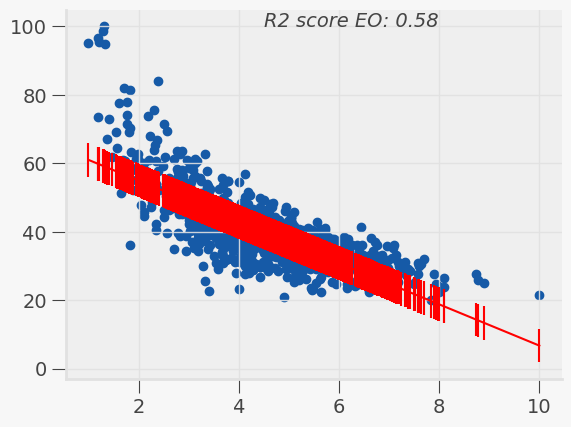

In [937]:
plt.scatter(df['Number of Units'],df['Manufacturing Cost'])
plt.errorbar(X,y_pred,mae,color="red")
plt.text(4.5, 100, "R2 score EO: {:0.2f}".format(r2_score(y, y_pred)), style='italic')
plt.show()

In [938]:
#ERROR ABSOLUTO MEDIO POLYNOMIAL 

In [939]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_predi))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predi)))
print('r2_score',r2_score(y, y_predi))  

Error medio Absoluto (MAE): 4.538765565228896
Root Mean Squared Error: 6.129173450227567
r2_score 0.6650268116056028


In [940]:
mae = mean_absolute_error(y,y_predi)

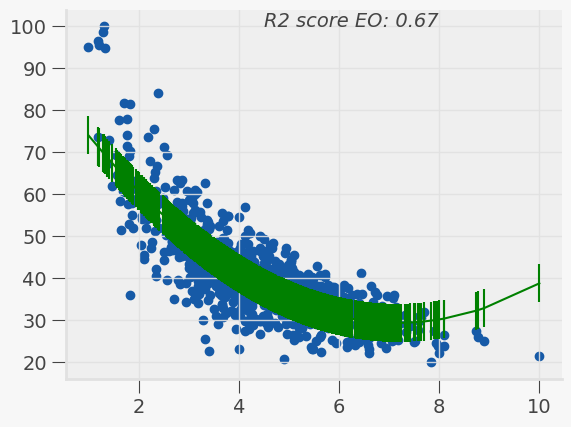

In [941]:
plt.scatter(df['Number of Units'],df['Manufacturing Cost'])
plt.errorbar(X,y_predi,mae,color="green")
plt.text(4.5, 100, "R2 score EO: {:0.2f}".format(r2_score(y, y_predi)), style='italic')
plt.show()

In [942]:
#ERROR ABSOLUTO MEDIO RIDGE

In [943]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_predic))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predic)))
print('r2_score',r2_score(y, y_predic))

Error medio Absoluto (MAE): 4.893993782234886
Root Mean Squared Error: 6.884775936361863
r2_score 0.5773451613157738


In [944]:
mae = mean_absolute_error(y,y_predic)


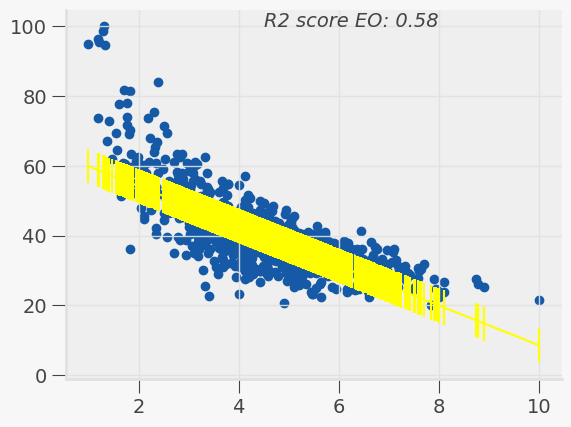

In [945]:
plt.scatter(df['Number of Units'],df['Manufacturing Cost'])
plt.errorbar(X,y_predic,mae,color="yellow")
plt.text(4.5, 100, "R2 score EO: {:0.2f}".format(r2_score(y, y_predic)), style='italic')
plt.show()

In [946]:
#ERROR ABSOLUTO MEDIO LASSO

In [947]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_predicci))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predicci)))
print('r2_score',r2_score(y, y_predicci))

Error medio Absoluto (MAE): 4.881975311817683
Root Mean Squared Error: 6.912146826953139
r2_score 0.5739778956241486


In [948]:
mae = mean_absolute_error(y,y_predicci)

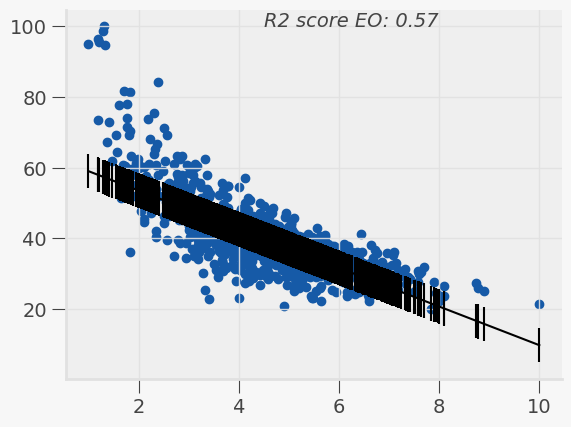

In [949]:
plt.scatter(df['Number of Units'],df['Manufacturing Cost'])
plt.errorbar(X,y_predicci,mae,color="black")
plt.text(4.5, 100, "R2 score EO: {:0.2f}".format(r2_score(y, y_predicci)), style='italic')
plt.show()

* Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

RESP : 
* En general, cuanto mayor es el R-cuadrado, mejor se ajusta el modelo a los datos.en los analisis presentados la regresion polinomial es la que mas alto valor me dio y por lo tanto se ajusta mas alos datos. Un R-cuadrado bajo es más problemático cuando se desea crear predicciones que sean razonablemente precisas. eso depende de los requisitos en cuanto a la anchura del intervalo de predicción y de cuánta variabilidad esté presente en los datos.
* EL porcentaje de entrenamiento fue de 70 % y de evaluacion de 30% para todos los casos
* Los valores del R-cuadrado se deben evaluar junto con las gráficas de residuos, otras estadísticas del modelo y el conocimiento de la materia para poder completar el cuadro

# Ejercicio 2. Regresión múltiple.
Realiza la regresión polinomial de los siguientes datos:

In [950]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5746,9542801310,20150513T000000,267000.0,3,2.25,2510,9900,1.0,0,0,...,8,1610,900,1978,0,98023,47.2988,-122.374,1940,8510
16143,2268000500,20140721T000000,229900.0,3,1.00,1440,11925,1.0,0,0,...,7,1440,0,1968,0,98003,47.2738,-122.300,1440,10425
10298,2916200138,20150202T000000,375000.0,3,2.00,1260,7560,2.0,0,0,...,6,1260,0,1943,0,98133,47.7225,-122.351,1260,7595
16173,8582010290,20140814T000000,683000.0,3,2.50,2300,9218,2.0,0,2,...,9,2300,0,1998,0,98027,47.5504,-122.077,2730,9930
12384,2652500126,20150217T000000,570500.0,2,1.00,1380,1800,2.0,0,0,...,7,1080,300,1954,0,98119,47.6416,-122.361,1600,3600
7080,8944360290,20150413T000000,477000.0,3,2.50,1740,4960,2.0,0,0,...,8,1740,0,1992,0,98029,47.5772,-121.998,1740,5021
20254,1332700020,20150116T000000,278000.0,2,2.25,1610,1968,2.0,0,0,...,7,1610,0,1979,0,98056,47.5184,-122.196,1950,1968
15993,9541600255,20150310T000000,762450.0,4,1.75,2570,8640,1.0,0,0,...,8,2570,0,1958,0,98005,47.5956,-122.172,2520,8800
11407,3432500310,20140624T000000,325000.0,3,1.00,850,6906,1.0,0,0,...,6,850,0,1948,0,98155,47.7441,-122.314,1150,6907
6859,993001330,20140505T000000,406100.0,3,2.25,1410,1332,3.0,0,0,...,8,1410,0,2005,0,98103,47.6916,-122.340,1430,1448


In [951]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [952]:
#Visualizar los datos
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [953]:
#Para ver si hay valores faltantes en el data frame
df.isnull().sum().sum()

0

In [954]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


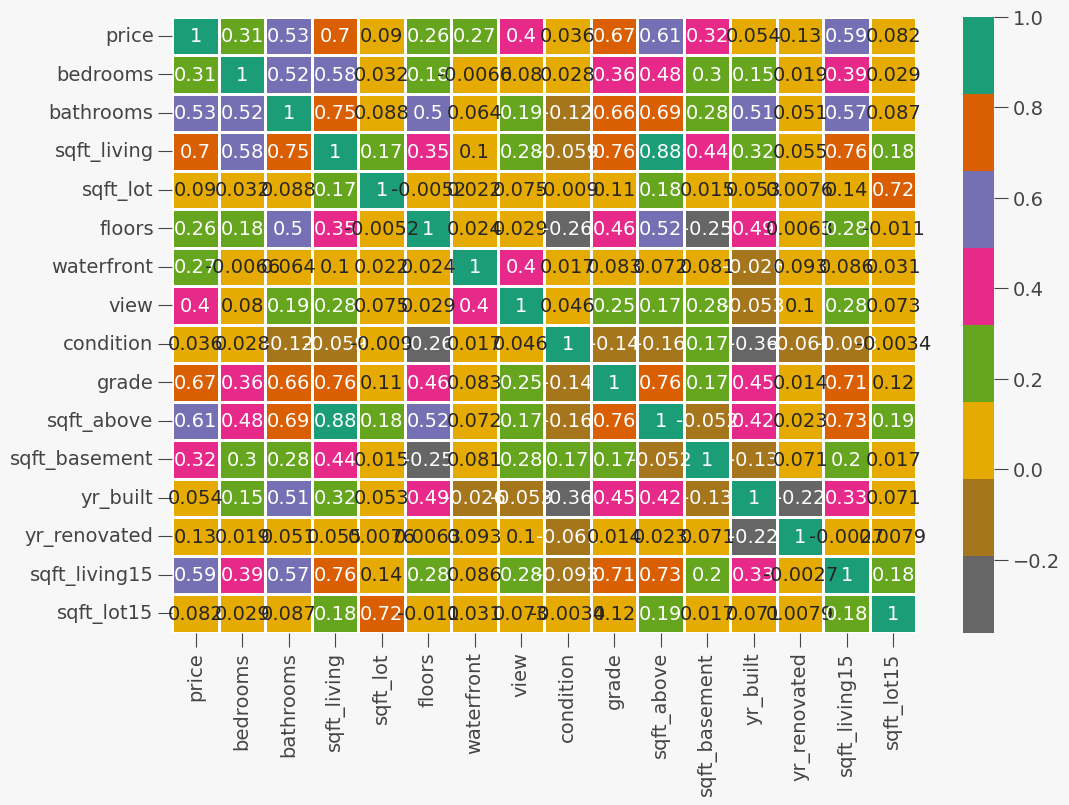

In [955]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [958]:
columns = df.columns.drop('price')


features = columns
label = ['sqft_living']

X = df[['grade']]
y = df['price']

In [959]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 1)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 1)


## Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada. 

In [960]:
# HACER LA REGRESION
lm= linear_model.LinearRegression()
model =lm.fit(X,y)

In [961]:
# VER LOS COEFICIENTES 
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['grade'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([208457.56245838]),
 'rank_': 1,
 'singular_': array([172.80443134]),
 'intercept_': -1056044.9770097742}

#### price = -1056044.9 +( 208457.5 * grade)
Ecuacion matematica para predecir 

In [962]:
# REALIZAR PREDICCIONES

y_pred = model.predict(X = df[['grade']])

### R^2
##### R_square = 1 - SSE/SST

In [963]:
ymean= df["price"].mean()
ymean

540088.1417665294

In [964]:
# SUM OF SQUARES TOTAL

SST = ((y - ymean)**2).sum()
SST


2912916761921299.5

In [965]:
# SUM OF ESTIMATED ERRORS
y_hat = y_pred
SSE = ((y - y_hat)**2).sum()
SSE

1615304141825851.2

In [966]:
(SST - SSE)/SST

0.4454684861092872

In [967]:
# Es la R^2
1 - SSE/SST

0.44546848610928724

In [968]:
# Verificando si la R^2 es correcta
model.score(X,y)

0.44546848610928724

In [969]:
#ERROR
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

74737618184.69676

## Realiza la regresión polinomial 
completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [970]:
pre_process = PolynomialFeatures(degree=2) 

In [971]:
X_poly = pre_process.fit_transform(X)
X_poly

array([[ 1.,  7., 49.],
       [ 1.,  7., 49.],
       [ 1.,  6., 36.],
       ...,
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  7., 49.]])

In [972]:
#HACER LA REGRESION 
pr_model = LinearRegression()
pr_model.fit(X_poly, y)

LinearRegression()

In [973]:
#HACER LA PREDECCION

y_predi = pr_model.predict(X_poly)



In [974]:
#COEFICIENTES DE LA ECUACION
pr_model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 3,
 'coef_': array([      0.        , -471327.49212202,   41910.13782882]),
 'rank_': 2,
 'singular_': array([2827.15428614,   20.00314747,    0.        ]),
 'intercept_': 1633983.002951643}

#### price = 163398.0 +( - 471327.4* Number of units)+ (41910.1)* grade**2
Ecuacion matematica para predecir

### R^2
##### R_square = 1 - SSE/SST

In [975]:
ymean= df["price"].mean()
ymean

540088.1417665294

In [976]:
# SUM OF SQUARES TOTAL

SST = ((y - ymean)**2).sum()
SST


2912916761921299.5

In [977]:
(SST - SSE)/SST

0.4454684861092872

In [978]:
# Verificando si la R^2 es correcta
model.score(X,y)

0.44546848610928724

In [979]:
#ERROR
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predi)

66033814885.48249

## Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

### RIDGE 

In [980]:
from sklearn.linear_model import Ridge

In [981]:
rid_model=Ridge(alpha=100)

In [982]:
rid_model.fit(X, y)

Ridge(alpha=100)

In [983]:
#HACER LA PREDICCION
y_predic = rid_model.predict(X)

In [984]:
#SlOPE
print("Slope: %.2f" % rid_model.coef_[0])

Slope: 207761.81


In [985]:
# INTERCEPCION Y COEFICIENTES PARA LA ECUACION 
rid_model.__dict__

{'alpha': 100,
 'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'max_iter': None,
 'tol': 0.001,
 'solver': 'auto',
 'positive': False,
 'random_state': None,
 'feature_names_in_': array(['grade'], dtype=object),
 'n_features_in_': 1,
 '_normalize': False,
 'coef_': array([207761.80805163]),
 'n_iter_': None,
 'intercept_': -1050717.6737541724}

Y = RSS + -1050717.6 (207761.8^2)

##### Ecuacion matematica para predecir 
RSS= SUMA RESIDUOS CUADRADOS

In [986]:
#ERROR
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predic)

74738287000.65709

### R^2
##### R_square = 1 - SSE/SST

In [987]:
ymean= df["price"].mean()
ymean

540088.1417665294

In [988]:
# SUM OF SQUARES TOTAL

SST = ((y - ymean)**2).sum()
SST

2912916761921299.5

In [989]:
# SUM OF ESTIMATED ERRORS
y_hat = y_predic
SSE = ((y - y_hat)**2).sum()
SSE

1615318596945201.8

In [990]:
#R^2
(SST - SSE)/SST

0.4454635236882735

### LASSO

In [991]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 1)

In [992]:
lasso.fit(X,y)

Lasso(alpha=1)

In [993]:
#HACER LA PREDICCION
y_predicci = lasso.predict(X)

In [994]:
#COEFICIENTES DE LA ECUACION E INTERCEPCION 
lasso.__dict__

{'alpha': 1,
 'l1_ratio': 1.0,
 'fit_intercept': True,
 'normalize': 'deprecated',
 'precompute': False,
 'max_iter': 1000,
 'copy_X': True,
 'tol': 0.0001,
 'warm_start': False,
 'positive': False,
 'random_state': None,
 'selection': 'cyclic',
 'feature_names_in_': array(['grade'], dtype=object),
 'n_features_in_': 1,
 'n_iter_': 2,
 'coef_': array([208456.8386805]),
 'dual_gap_': 3.4701337158191826e-05,
 'intercept_': -1056039.435134376}


Y = LSO + 1 (208456.8^2)
##### Ecuacion matematica para predecir 
LSO = least square objective

In [995]:
#ERRROR
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predicci)

74737618185.42055

In [996]:
lasso.score(X,y)

0.445468486103917

### R^2
##### R_square = 1 - SSE/SST

In [997]:
ymean= df["price"].mean()
ymean

540088.1417665294

In [998]:
SST = ((y - ymean)**2).sum()
SST

2912916761921299.5

In [999]:
# SUM OF ESTIMATED ERRORS
y_hat = y_predicci
SSE = ((y - y_hat)**2).sum()
SSE

1615304141841494.2

In [1000]:
# R^2
(SST - SSE)/SST

0.445468486103917

### MAE y R^2

In [1001]:
#ERROR ABSOLUTO MEDIO LINEAR 


In [1002]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))   

Error medio Absoluto (MAE): 175179.0251031181
Root Mean Squared Error: 273381.8175824734
r2_score 0.44546848610928724


In [1003]:
from sklearn.metrics import mean_absolute_error

In [1004]:
mae = mean_absolute_error(y,y_pred)

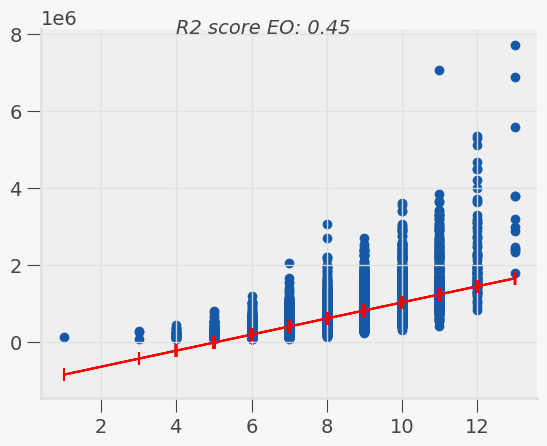

In [1005]:
plt.scatter(df['grade'],df['price'])
plt.errorbar(X,y_pred,mae,color="red")
plt.text(4, 8000000, "R2 score EO: {:0.2f}".format(r2_score(y, y_pred)), style='italic')
plt.show()

In [1006]:
#ERROR ABSOLUTO MEDIO POLYNOMIAL 

In [1007]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_predi))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predi)))
print('r2_score',r2_score(y, y_predi)) 

Error medio Absoluto (MAE): 165209.9308852917
Root Mean Squared Error: 256970.45527741607
r2_score 0.5100481895752528


In [1008]:
mae = mean_absolute_error(y,y_predi)

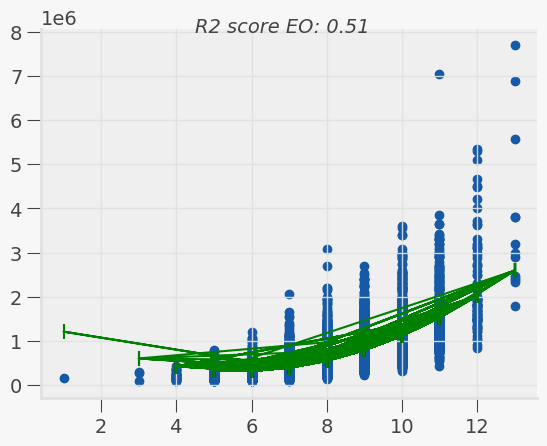

In [1009]:
plt.scatter(df['grade'],df['price'])
plt.errorbar(X,y_predi,mae,color="green")
plt.text(4.5, 8000000, "R2 score EO: {:0.2f}".format(r2_score(y, y_predi)), style='italic')
plt.show()

In [1010]:
#ERROR ABSOLUTO MEDIO RIDGE

In [1011]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_predic))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predic)))
print('r2_score',r2_score(y, y_predic))

Error medio Absoluto (MAE): 175033.5839237788
Root Mean Squared Error: 273383.04080658895
r2_score 0.44546352368827347


In [1012]:
mae = mean_absolute_error(y,y_predic)

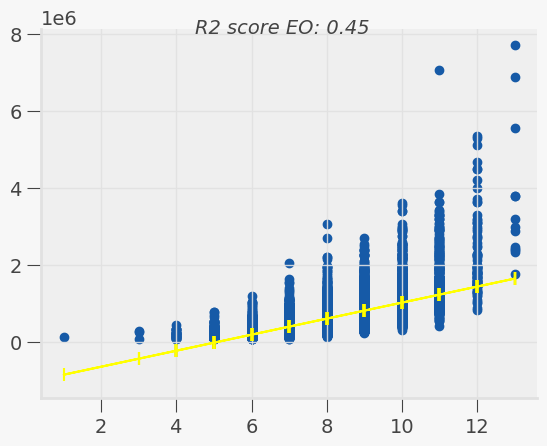

In [1013]:
plt.scatter(df['grade'],df['price'])
plt.errorbar(X,y_predic,mae,color="yellow")
plt.text(4.5, 8000000, "R2 score EO: {:0.2f}".format(r2_score(y, y_predic)), style='italic')
plt.show()

In [1014]:
#ERROR ABSOLUTO MEDIO LASSO

In [1015]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_predicci))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predicci)))
print('r2_score',r2_score(y, y_predicci))

Error medio Absoluto (MAE): 175178.87166282377
Root Mean Squared Error: 273381.81758379715
r2_score 0.445468486103917


In [1016]:
mae = mean_absolute_error(y,y_predicci)

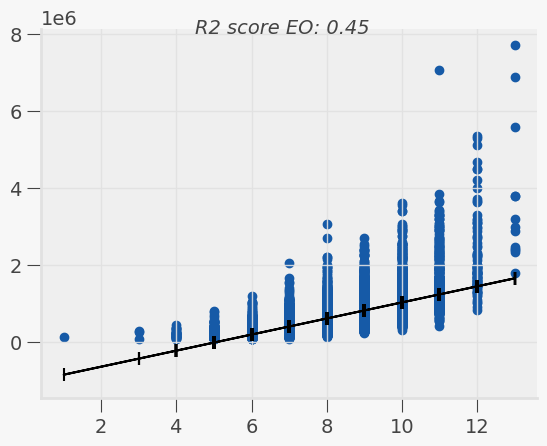

In [1017]:
plt.scatter(df['grade'],df['price'])
plt.errorbar(X,y_predicci,mae,color="black")
plt.text(4.5, 8000000, "R2 score EO: {:0.2f}".format(r2_score(y, y_predicci)), style='italic')
plt.show()

* Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

RESP : 
* En general, cuanto mayor es el R-cuadrado, mejor se ajusta el modelo a los datos.en los analisis presentados la regresion polinomial es la que mas alto valor me dio y por lo tanto se ajusta mas a los datos. Un R-cuadrado bajo es más problemático cuando se desea crear predicciones que sean razonablemente precisas. eso depende de los requisitos en cuanto a la anchura del intervalo de predicción y de cuánta variabilidad esté presente en los datos.
* EL porcentaje de entrenamiento fue de 90 % y de evaluacion de 10% para todos los casos determinado por el ejercicio
* Los valores del R-cuadrado se deben evaluar junto con las gráficas de residuos, otras estadísticas del modelo y el conocimiento de la materia para poder completar el cuadro

# Notebook 2. K means

In [1018]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Defaulting to user installation because normal site-packages is not writeable


In [1019]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [1020]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [1021]:
df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [1022]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


Definición de Latitud y Longitud

Latitud Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

Longitud: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste

In [1023]:
latlong=df[["latitude","longitude"]]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

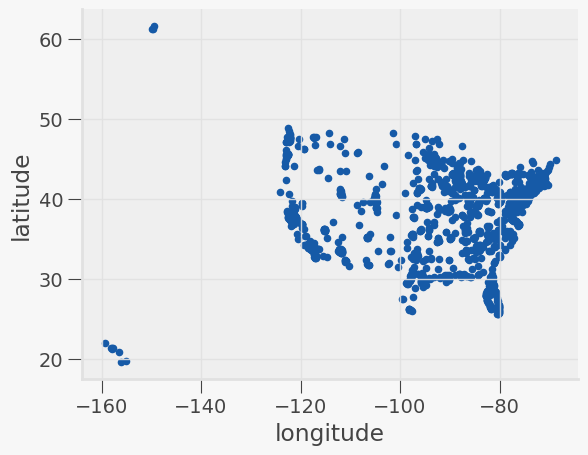

In [1024]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [1025]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [1026]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [1027]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [1028]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [1029]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [1030]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

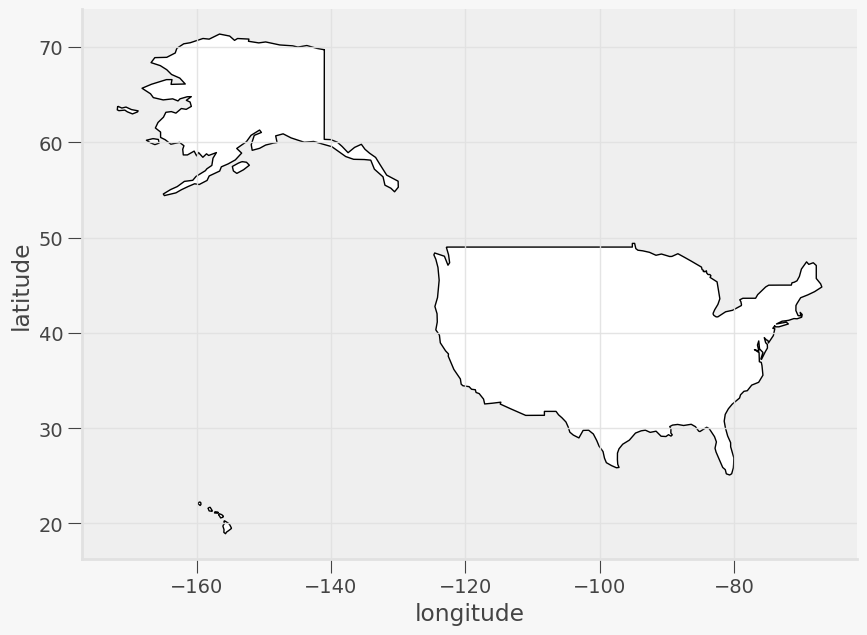

In [1031]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

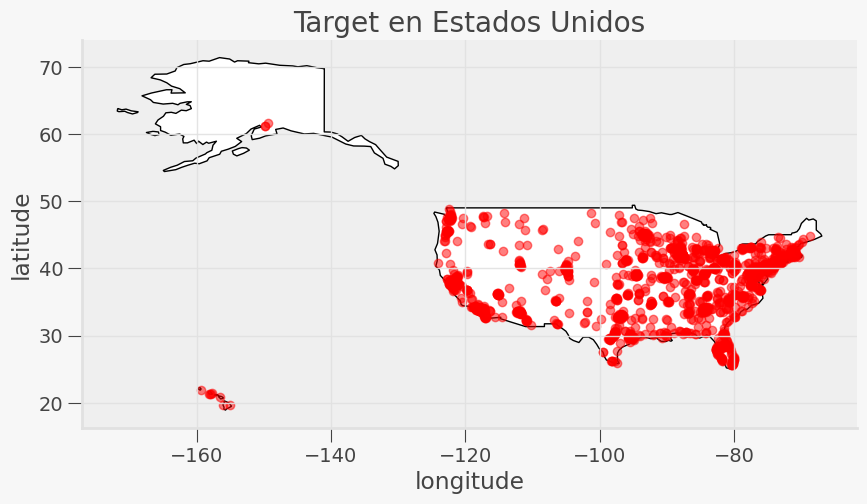

In [1032]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [1033]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [1034]:
# DEFINIR UN RANGO DE K Y PROBAR
clusters = range(1,50)
inercias=[]
for cluster in clusters:
    model = KMeans(n_clusters = cluster) 
    model = model.fit(latlong)

    inercias.append(model.inertia_)

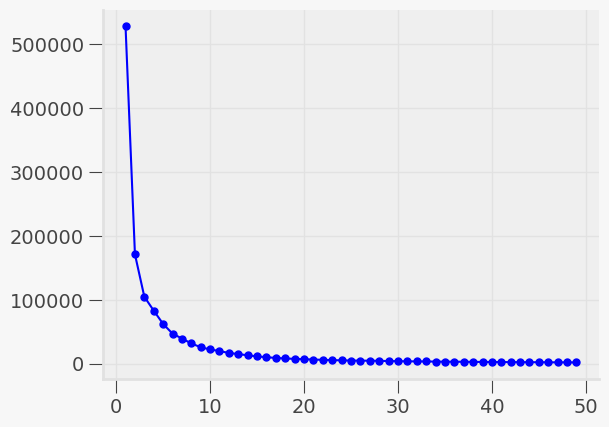

In [1035]:
# HACER UN DIAGRAMA DE CODO
plt.plot(clusters, inercias, 'bo-', markersize=5)

In [1036]:
# SE ELIGE EL CLUSTER DE ACUERDO AL CODO Y SE VUELVE A ENTRENAR EL MODELO
model = KMeans(n_clusters=25)
model =kmeans.fit(latlong)

In [1037]:
# OBTENER CENTROS DE CADA CLUSTER
centros = kmeans.cluster_centers_
centros

array([[  40.34198355,  -75.26720102],
       [  37.57757741, -119.14645561],
       [  36.55629613,  -84.80260815],
       [  36.99505521,  -96.97278809]])

IndexError: index 4 is out of bounds for axis 0 with size 4

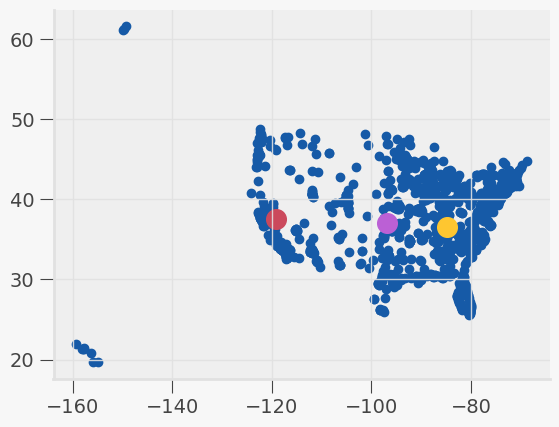

In [1038]:
# GRAFICAR
plt.scatter (latlong.longitude, latlong.latitude)

for i in clusters:
    plt.scatter(centros[i][1], centros[i][0], label = i, s = 200)


plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# OBTENER EL NUMERO DE TIENDAS POR ALMACEN
plt.title('Tiendas por almacén')
plt.ylabel('Número de tiendas')
latlong.kmeans.value_counts().plot(kind='bar')

plt.show()


In [ ]:
# SE ELIGE EL CLUSTER Y SE VUELVE A ENTRENAR EL MODELO
model = KMeans(n_clusters=5)
model =kmeans.fit(latlong)


* ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

RESP : el numero de almacenes lo hice mediante la grafica de codo y escogi un valor donde se forma el codo.

* ¿qué librerías nos pueden ayudar a graficar este tipo de datos?

RESP : Una libreria que puede ayudarnos a graficar mejor es  
* Geopy de Python para acceder a servicios de geocodificación que facilita localizar las coordenadas de direcciones en todo el mundo.
Tambien está :
* Folium para poder visualizar el mapas

* ¿Consideras importante que se grafique en un mapa?, ¿por qué?

RESP : Es importante que se grafique en un mapa por que de esa forma se pude visualizar y entender mejor, de lo contrario seria muy dificil para todos poder entender lso datos.

* Conclusiones : Reducir los costos es importante para todo negocio, en este caso optimizar la gasolina es muy importante y ademas reducir los tiempos de entrega.Este tipo de herramientas nos permiten aplicar esto para otro tipo de negocios donde se requiera posicionar o mover pedidos en un mapa a nivel mundial